<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Deep_Learning_Assignments/blob/main/Assignment_3/Pytorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook consists of the following implemented using:
  
  - Pytorch with builtin functionality
  - Pytorch without builtin functionality

    - 3 layer neural network 
    - 3 variable based non linear equation(cubic non linear equation)
    - Relu for non-linear activation function, implemented chain rule based gradient propagation
    - used appropriate number of neurons and epochs


In [ ]:
!pip install umap
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=ba357bc5e31095d6378d9769c3e03beabb21e1e7d734d9d265f2f80fdde205bb
  Stored in directory: /root/.cache/pip/wheels/d4/13/91/2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

Introducing non-linearity in the neural network with a non-linear activation function - Relu. This enables the network to model complex relationships between input and output variables.

Without non-linear function, the output of each neuron would be a linear combination of the input variables - results in linear model - limitation in representing complex patterns in data

Some non-linear functions used : sigmoid, ReLU, Tanh. 
Model complex relationships between input and output variables and learn more complex patterns in data

In [ ]:
import umap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go

def plot_4d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y.flatten(), cmap='Blues_r', label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.flatten(), cmap='Reds_r', label='our function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()

Setting up the data first

x: (300, 3), weights: (3, 1), bias: (1,), y: (300, 1)


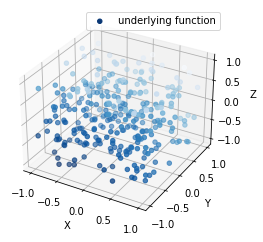

In [ ]:
n = 300
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 5, 7]]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

#reducer = umap.UMAP(n_components=4)
#x_reduced = reducer.fit_transform(x)

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x, y_true)


Neural network for non-linear Regression

Activation function : Relu

Layers in neural network:

Input layer -> Hidden layer 1(50 neurons) -> Hidden layer 2(50 neurons) -> Output layers

learning rate : 0.01

The objective is to minimize error, and here we see that the error is converging towards 0.


###Using Pytorch built-in functionality

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden1, num_hidden2):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden1)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden1, num_hidden2)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(num_hidden2, 1)
    
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

In [ ]:
loss = nn.MSELoss()
model = TorchModel(d, 50, 50)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(100.6211, grad_fn=<MseLossBackward0>)


In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(100.6211, grad_fn=<MseLossBackward0>)
tensor(97.6995, grad_fn=<MseLossBackward0>)


In [ ]:
from typing import Callable

tensor(97.6995, grad_fn=<MseLossBackward0>)
tensor(94.9034, grad_fn=<MseLossBackward0>)
tensor(91.7926, grad_fn=<MseLossBackward0>)
tensor(87.9260, grad_fn=<MseLossBackward0>)
tensor(82.9213, grad_fn=<MseLossBackward0>)
tensor(76.4869, grad_fn=<MseLossBackward0>)
tensor(68.5298, grad_fn=<MseLossBackward0>)
tensor(59.4178, grad_fn=<MseLossBackward0>)
tensor(50.0705, grad_fn=<MseLossBackward0>)
tensor(41.4909, grad_fn=<MseLossBackward0>)
tensor(34.0481, grad_fn=<MseLossBackward0>)
tensor(27.7713, grad_fn=<MseLossBackward0>)
tensor(22.9764, grad_fn=<MseLossBackward0>)
tensor(19.6230, grad_fn=<MseLossBackward0>)
tensor(17.2752, grad_fn=<MseLossBackward0>)
tensor(15.5973, grad_fn=<MseLossBackward0>)
tensor(14.3848, grad_fn=<MseLossBackward0>)
tensor(13.4583, grad_fn=<MseLossBackward0>)
tensor(12.7284, grad_fn=<MseLossBackward0>)
tensor(12.1349, grad_fn=<MseLossBackward0>)
tensor(11.6342, grad_fn=<MseLossBackward0>)
tensor(11.1909, grad_fn=<MseLossBackward0>)
tensor(10.7879, grad_fn=<MseLoss

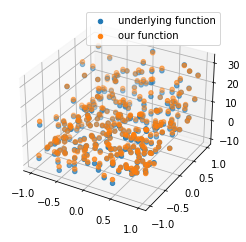

In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.01, num_epochs=300)
plot_3d(x, y_true, model(x_tensor).detach())

###Using Pytorch without pytorch builtin layer functionality(from scratch)

In [ ]:
import torch

n = 300
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 5, 7]]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true


print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x, y_true)


tensor([[2.],
        [5.],
        [7.]])
x: torch.Size([300, 3]), weights: torch.Size([3, 1]), bias: torch.Size([1]), y: torch.Size([300, 1])


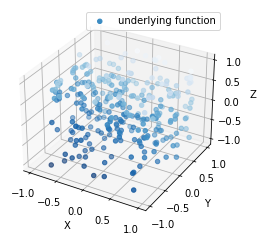

In [ ]:
n = 300
d = 3
x = torch.rand(n, d) * 2 - 1

weights_true = torch.tensor([[2.0, 5.0, 7.0]]).T
bias_true = torch.tensor([1.0])

x3 = (x ** 3)
x2 = (x ** 2)
print(weights_true)
y_true =  torch.matmul(x3, weights_true) + torch.matmul(x2, weights_true) + torch.matmul(x, weights_true) + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')


plot_4d(x, y_true)

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

In [ ]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = torch.randn(input_dim, num_hidden) * torch.sqrt(torch.tensor(2. / input_dim))
    self.bias = torch.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = torch.matmul(x, self.weights) + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = torch.matmul(self.x.T, gradient)
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = torch.matmul(gradient, self.weights.T)
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
from typing import Callable

def fit(x: torch.tensor, y: torch.tensor, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      #to debug 
      #import pdb
      #pdb.set_trace() 
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden1, num_hidden2):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hidden2, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

tensor(119.6776)


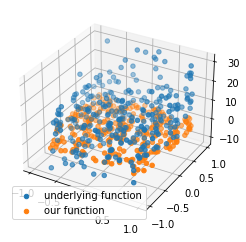

In [ ]:
loss = MSE()
model = Model(d, 50, 50)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

Epoch 0, loss 119.67760467529297
Epoch 1, loss 103.27977752685547
Epoch 2, loss 87.6182632446289
Epoch 3, loss 73.06520080566406
Epoch 4, loss 60.28752136230469
Epoch 5, loss 49.541038513183594
Epoch 6, loss 40.62574005126953
Epoch 7, loss 33.382179260253906
Epoch 8, loss 27.637313842773438
Epoch 9, loss 23.20457649230957
Epoch 10, loss 19.84151840209961
Epoch 11, loss 17.282819747924805
Epoch 12, loss 15.325325965881348
Epoch 13, loss 13.796686172485352
Epoch 14, loss 12.566056251525879
Epoch 15, loss 11.552517890930176
Epoch 16, loss 10.698887825012207
Epoch 17, loss 9.969197273254395
Epoch 18, loss 9.330547332763672
Epoch 19, loss 8.7686767578125
Epoch 20, loss 8.273816108703613
Epoch 21, loss 7.838377952575684
Epoch 22, loss 7.453471660614014
Epoch 23, loss 7.111239433288574
Epoch 24, loss 6.805449962615967
Epoch 25, loss 6.534358501434326
Epoch 26, loss 6.292556285858154
Epoch 27, loss 6.07521915435791
Epoch 28, loss 5.878971576690674
Epoch 29, loss 5.701568126678467
Epoch 30, los

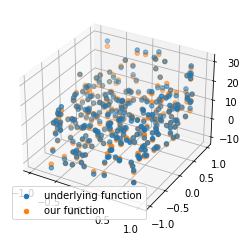

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=500)
plot_3d(x, y_true, model(x))

Pytorch

In [ ]:
import torch
from torch import nn

In [ ]:
class MNISTClassifier(nn.Module):
  def __init__(self):
    super(MNISTClassifier, self).__init__()

    #mnist images are (1,28,28) (channels,width,height):
    self.layer_1 = torch.nn.Linear(28*28, 128)
    self.layer_2 = torch.nn.Linear(128, 256)
    self.layer_3 = torch.nn.Linear(256, 10)
  
  def forward(self, x):
    batch_size, channels, width, height = x.size()

    x = x.view(batch_size, -1)

    #layer1
    x = self.layer_1(x)
    x = torch.relu(x)

    #layer2
    x = self.layer_2(x)
    x = torch.relu(x)

    #layer3
    x = self.layer_3(x)

    x = torch.log_softmax(x, dim=1)

    return x